In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime as dt



# Summary Statistics

In [31]:
# reading a saved data
game_avg_df = pd.read_csv("Game_Data/game_avg.csv")
game_mode_df = pd.read_csv("Game_Data/game_mode.csv")
genre_df = pd.read_csv("Game_Data/genre.csv")
release_df = pd.read_csv("Game_Data/released_date.csv")
dev_df = pd.read_csv("Game_Data/developer.csv")
pub_df = pd.read_csv("Game_Data/publisher.csv")

In [32]:
# game average summary using describe
game_avg_df = game_avg_df[['Title' ,'Average Score' ,'Score Count']]

game_avg_df.describe()

,Average Score,Score Count
count,415.000000,415.000000
mean,67.719716,8.074699
std,14.002776,17.444784
min,0.000000,1.000000
25%,60.000000,2.000000
50%,70.000000,3.000000
75%,80.000000,8.000000
max,96.411723,166.000000


In [33]:
# game mode summary using value counts
game_mode_df["Game Modes"].value_counts()


Game Modes
Single player                         369
Multiplayer                           202
Co-operative                          139
Massively Multiplayer Online (MMO)     39
Battle Royale                          10
Split screen                            7
Name: count, dtype: int64

In [34]:
# genre summary using value counts
genre_df["Genres"].value_counts()

Genres
Indie                         344
Adventure                     184
Simulator                     175
Role-playing (RPG)            158
Strategy                      150
Shooter                        76
Arcade                         36
Racing                         27
Puzzle                         26
Sport                          23
Real Time Strategy (RTS)       18
Fighting                       18
Platform                       18
Card & Board Game              17
Tactical                       16
Hack and slash/Beat 'em up     14
Turn-based strategy (TBS)      12
Point-and-click                 7
Music                           6
Visual Novel                    4
MOBA                            3
Name: count, dtype: int64

In [35]:
# release date summary using value counts
release_df["Dates"].value_counts()


Dates
TBD             34
2024            10
Jul 20, 2023     9
Sep 12, 2023     8
Oct 22, 2020     8
                ..
Dec 23, 2021     1
May 27, 2023     1
Jan 28, 2021     1
Nov 01, 2019     1
Sep 08, 2020     1
Name: count, Length: 604, dtype: int64

In [166]:
# platform summary using value counts
release_df["Platforms"].value_counts()

Platforms
PC (Microsoft Windows)    489
Nintendo Switch           125
Mac                       119
Xbox One                   88
Linux                      85
PlayStation 4              83
Xbox Series X|S            44
PlayStation 5              38
iOS                        22
Android                    18
PlayStation VR             17
SteamVR                    15
Oculus Quest                9
Meta Quest 2                9
Oculus VR                   6
Oculus Rift                 6
PlayStation VR2             4
Web browser                 4
Windows Mixed Reality       3
Google Stadia               2
DOS                         2
PlayStation 2               1
Name: count, dtype: int64

In [167]:
top_platforms = ["PC (Microsoft Windows)", "Nintendo Switch", "iOS", "PlayStation VR"]

In [37]:
# region summary using value counts
release_df["Regions"].value_counts()

Regions
Worldwide        987
North America    135
Europe            57
Japan              5
Asia               2
Australia          2
Korea              1
Name: count, dtype: int64

In [38]:
# developer summary using value counts
dev_df["Developers"].value_counts()

Developers
Hyper Hippo Entertainment    3
Chasing Carrots              2
Jutsu Games                  2
Asmodee Digital              2
Kyodai                       2
                            ..
Overall adventures ltd       1
Slavic Magic                 1
Crate Entertainment          1
Stray Bombay                 1
Kindred Games                1
Name: count, Length: 417, dtype: int64

In [156]:
dev_df["Games Developed"].describe()

count    428.000000
mean       4.282710
std        8.874455
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       89.000000
Name: Games Developed, dtype: float64

In [158]:
dev_df.loc[dev_df["Games Developed"]==89, :]

,Title,Average Score,Grade,Score Count,Developers,Games Developed
267,GetsuFumaDen: Undying Moon,70.5,High,2,Konami Digital Entertainment,89


In [39]:
# publisher summary using value counts
pub_df["Publishers"].value_counts()

Publishers
Iceberg Interactive            5
Forever Entertainment S. A.    4
Team17                         3
Plug In Digital                3
The Irregular Corporation      3
                              ..
Ben Johnson (bencelot)         1
Snail Games                    1
Ballon Moose Games             1
Ziff Davis Media               1
All Parts Connected            1
Name: count, Length: 397, dtype: int64

In [155]:
pub_df["Games Published"].describe()

count     439.000000
mean       28.542141
std        94.190167
min         1.000000
25%         1.000000
50%         3.000000
75%        21.000000
max      1671.000000
Name: Games Published, dtype: float64

In [157]:
pub_df.loc[(pub_df["Games Published"]==1671), :]

,Title,Average Score,Grade,Score Count,Publishers,Games Published
268,GetsuFumaDen: Undying Moon,70.5,High,2,Konami,1671


# Visualizations

In [40]:
# Bin/Categorize average score into letter grades
# Define the bins and labels for the categories
bins = [0,25,50,75,100]
labels = ['Low', 'Medium', 'High', 'Very High']

""" 
1. Create a new column with categorical 'Grade' values based on binning the numeric 'Average Score' values column for all the dataframes.
2. Rearrange columns such that 'Grade' and 'Average Score' are next to each other and 'Unnamed: 0' column is removed.
3. Set the original dataframe variables to the modified dataframes.
"""
dframes = [game_avg_df, game_mode_df, genre_df, release_df, dev_df, pub_df]
new_dframes = []
for df in dframes:
    df['Grade'] = pd.cut(df['Average Score'], bins=bins, labels=labels, include_lowest=True) # 1.
    df = df[['Title', 'Average Score', 'Grade'] + [col for col in df.columns if col not in ['Unnamed: 0', 'Title', 'Average Score', 'Grade']]] # 2.
    new_dframes.append(df)
# 3.
game_avg_df = new_dframes[0]
print(game_avg_df)
game_mode_df = new_dframes[1]
print(game_mode_df)
genre_df = new_dframes[2]
print(genre_df)
release_df = new_dframes[3]
print(release_df)
dev_df = new_dframes[4]
print(dev_df)
pub_df = new_dframes[5]
print(pub_df)



                         Title  Average Score      Grade  Score Count
0                      Valheim      87.993753  Very High          166
1                     Palworld      70.710829       High          163
2                7 Days to Die      54.106972       High          141
3                 Satisfactory      74.774596       High          110
4              Project Zomboid      82.131361  Very High          106
..                         ...            ...        ...          ...
410              Final Assault      70.000000       High            1
411                      BoxVR      80.000000  Very High            1
412                      Sipho      70.000000       High            1
413         The Snowboard Game      60.000000       High            1
414  Swords 'n Magic and Stuff      80.000000  Very High            1

[415 rows x 4 columns]
                         Title  Average Score      Grade  Score Count  \
0                      Valheim      87.993753  Very High       

In [41]:
# summary of how many games in each letter grade using value counts
game_avg_df["Grade"].value_counts()

Grade
High         222
Very High    130
Medium        57
Low            6
Name: count, dtype: int64

## Regions and Average Score Trends (Pie chart)

In [42]:
# Group the Very High graded games by regions as counts of the number games available in each region.
released_top_rated_df =release_df[release_df["Grade"]=="Very High"].groupby("Regions")["Grade"].count()
released_top_rated_df

Regions
Europe            10
North America     30
Worldwide        302
Name: Grade, dtype: int64

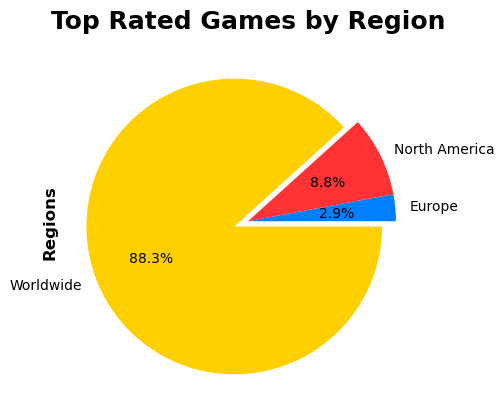

In [64]:
# Generate a pie plot of the groupby.
colors=["#007FFF", "#FF3333", "#ffd000"]
plt.pie(released_top_rated_df.values, labels=released_top_rated_df.index, autopct='%1.1f%%', explode=(0, 0, 0.1), colors=colors)
plt.title("Top Rated Games by Region", fontweight ="bold", fontsize=18)
plt.ylabel("Regions", fontweight ="bold", fontsize=12)


plt.savefig("Visuals/Top_rated_games_by_region.png",dpi=1200)
plt.show()

In [43]:
# Group all the games by regions as counts of the number games available in each region.
region_df =release_df.groupby("Regions")["Grade"].count()
region_df

Regions
Asia               2
Australia          2
Europe            57
Japan              5
Korea              1
North America    135
Worldwide        987
Name: Grade, dtype: int64

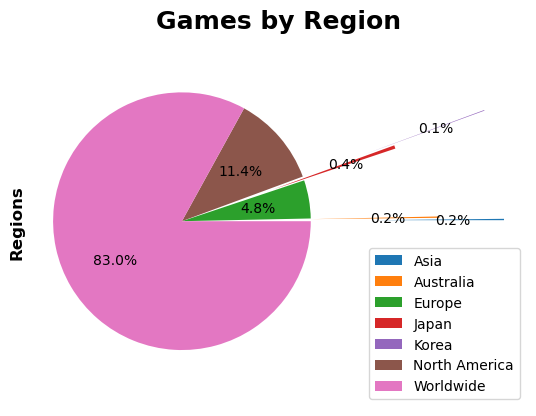

In [104]:
# Generate a pie plot of the groupby.
sizes = [220, 95, 80, 100]

plt.pie(region_df.values, explode=(1.5,1,0,0.75,1.5,0,0),autopct='%1.1f%%')
plt.title("Games by Region", fontweight ="bold", fontsize=18)
plt.ylabel("Regions", fontweight ="bold", fontsize=12)
plt.legend( labels=region_df.index,loc="lower right")
#plt.set_size_inches(12, 16)

plt.savefig("Visuals/Games_by_region.png",dpi=1200)
plt.axis("equal")
plt.show()
#plt.tight_layout()

## Genres and Average Score (Stacked bar chart)

In [79]:
# Group all the games by genre as counts of all the games in each genre: this will be the first segment of the stacked bar.
genre_count = genre_df.groupby("Genres")["Grade"].count()
genre_count

Genres
Adventure                     184
Arcade                         36
Card & Board Game              17
Fighting                       18
Hack and slash/Beat 'em up     14
Indie                         344
MOBA                            3
Music                           6
Platform                       18
Point-and-click                 7
Puzzle                         26
Racing                         27
Real Time Strategy (RTS)       18
Role-playing (RPG)            158
Shooter                        76
Simulator                     175
Sport                          23
Strategy                      150
Tactical                       16
Turn-based strategy (TBS)      12
Visual Novel                    4
Name: Grade, dtype: int64

In [66]:
# Group the top rated games by genre as counts of all the games in each genre: this will be the second of the stacked bar
genre_top_rated = genre_df[genre_df["Grade"]== "Very High"].groupby("Genres")["Grade"].count()
genre_top_rated

Genres
Adventure                      50
Arcade                         12
Card & Board Game               4
Fighting                        7
Hack and slash/Beat 'em up      4
Indie                         103
Music                           2
Platform                        6
Point-and-click                 3
Puzzle                          8
Racing                         12
Real Time Strategy (RTS)        5
Role-playing (RPG)             46
Shooter                        20
Simulator                      55
Sport                          12
Strategy                       40
Tactical                        7
Turn-based strategy (TBS)       5
Name: Grade, dtype: int64

In [105]:
# Combine the groupbys into a DataFrame so that the bar graphs will have the same categories, 
# which will resolve the encountered problem with stacking the bars graphs together
genre_counts_df = pd.DataFrame({
    "Total Count": genre_count,
    "Top Rated Count": genre_top_rated
}).fillna(0) # Replace nulls with value that occur since certain genres don't have games of the highest grade.
genre_counts_df

,Total Count,Top Rated Count
Genres,,
Adventure,184,50.0
Arcade,36,12.0
Card & Board Game,17,4.0
Fighting,18,7.0
Hack and slash/Beat 'em up,14,4.0
Indie,344,103.0
MOBA,3,0.0
Music,6,2.0
Platform,18,6.0


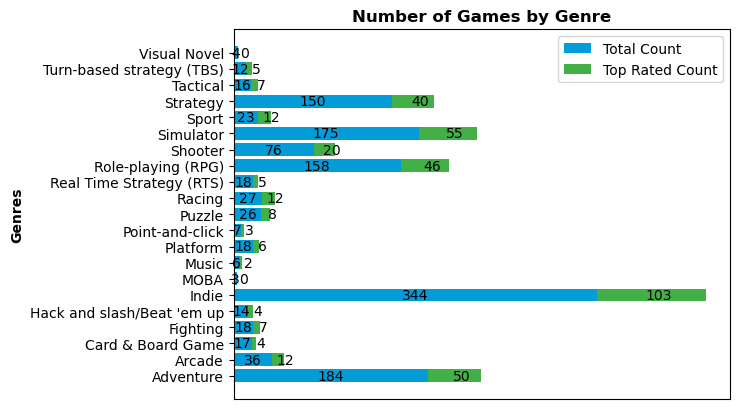

In [114]:
fig, ax = plt.subplots()
# Plot the first segment of each bar
total = ax.barh(genre_counts_df.index, genre_counts_df["Total Count"].values, color="#049CD8", label="Total Count")
# Plot the second segment of each bar on top of the first segment
top = ax.barh(genre_counts_df.index, genre_counts_df["Top Rated Count"].values, left=genre_counts_df["Total Count"].values, color="#43B047", label="Top Rated Count")
ax.bar_label(top, label_type='center', padding=5)
ax.bar_label(total, label_type='center')
ax.xaxis.set_visible(False)
#ax.set_xlabel('Number of Games', fontweight ="bold")
ax.set_ylabel('Genres', fontweight ="bold")
ax.set_title("Number of Games by Genre", fontweight ="bold")
ax.legend(loc="best")
plt.savefig("Visuals/Number_of_games_by_genre.png",bbox_inches="tight")
plt.show()

## Game Modes and Average Score (Stacked bar chart)

In [71]:
# Group all the games by game mode as counts of all the games in each game mode: this will be the first segment of the stacked bar.
mode_count = game_mode_df.groupby("Game Modes")["Grade"].count()
mode_count

Game Modes
Battle Royale                          10
Co-operative                          139
Massively Multiplayer Online (MMO)     39
Multiplayer                           202
Single player                         369
Split screen                            7
Name: Grade, dtype: int64

In [72]:
# Group the top rated games by game mode as counts of all the games in each game mode: this will be the second segment of the stacked bar.
mode_top_rated = game_mode_df[game_mode_df["Grade"]== "Very High"].groupby("Game Modes")["Grade"].count()
mode_top_rated

Game Modes
Battle Royale                           4
Co-operative                           43
Massively Multiplayer Online (MMO)     10
Multiplayer                            66
Single player                         111
Split screen                            1
Name: Grade, dtype: int64

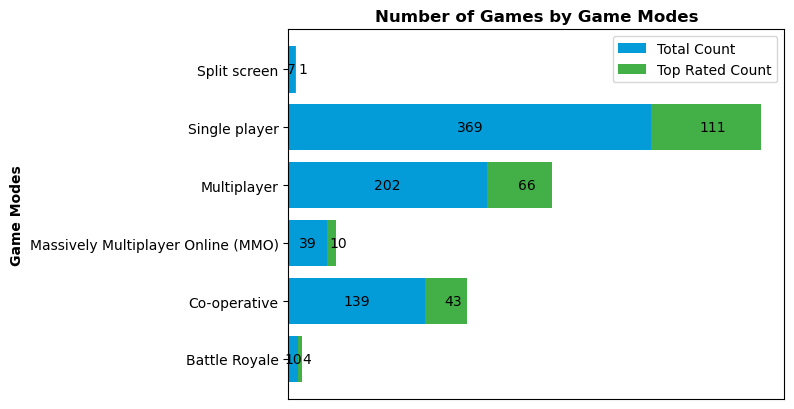

In [101]:
fig, ax = plt.subplots()
total = ax.barh(mode_count.index,mode_count.values,color= "#049CD8",label="Total Count")
top = ax.barh(mode_top_rated.index,mode_top_rated.values, left =mode_count.values, color= "#43B047",label= "Top Rated Count" )
ax.bar_label(top, label_type='center', padding=5)
ax.bar_label(total, label_type='center')
ax.xaxis.set_visible(False)
#ax.set_xlabel('Number of Games', fontweight ="bold")
ax.set_ylabel('Game Modes', fontweight ="bold")
ax.set_title("Number of Games by Game Modes", fontweight ="bold")
ax.legend(loc="best")
plt.savefig("Visuals/Number_of_games_by_game_mode.png",bbox_inches="tight")
plt.show()

# Release Dates, Platform, and Average Score (Line Chart)

In [120]:
# Filter release_df so that it only has complete dates
df_released_dates = release_df.loc[release_df["Dates"].str.len() == 12, :]
df_released_dates

,Title,Average Score,Grade,Score Count,Dates,Platforms,Regions
0,Valheim,87.993753,Very High,166,"Mar 14, 2023",Xbox One,Worldwide
1,Valheim,87.993753,Very High,166,"Mar 14, 2023",Xbox Series X|S,Worldwide
2,Valheim,87.993753,Very High,166,"Sep 16, 2022",Xbox One,North America
3,Valheim,87.993753,Very High,166,"Sep 16, 2022",Xbox Series X|S,North America
4,Valheim,87.993753,Very High,166,"Feb 02, 2021",PC (Microsoft Windows),Worldwide
...,...,...,...,...,...,...,...
1184,Sipho,70.000000,High,1,"Nov 13, 2018",PC (Microsoft Windows),Worldwide
1185,Sipho,70.000000,High,1,"Nov 13, 2018",Mac,Worldwide
1186,Sipho,70.000000,High,1,"Nov 13, 2018",Linux,Worldwide
1187,The Snowboard Game,60.000000,High,1,"Apr 24, 2018",PC (Microsoft Windows),Worldwide


In [150]:
df_released_dates.loc[:,'Dates'] = pd.to_datetime(df_released_dates.loc[:,'Dates'])
df_released_dates

,Title,Average Score,Grade,Score Count,Dates,Platforms,Regions
0,Valheim,87.993753,Very High,166,2023-03-14,Xbox One,Worldwide
1,Valheim,87.993753,Very High,166,2023-03-14,Xbox Series X|S,Worldwide
2,Valheim,87.993753,Very High,166,2022-09-16,Xbox One,North America
3,Valheim,87.993753,Very High,166,2022-09-16,Xbox Series X|S,North America
4,Valheim,87.993753,Very High,166,2021-02-02,PC (Microsoft Windows),Worldwide
...,...,...,...,...,...,...,...
1184,Sipho,70.000000,High,1,2018-11-13,PC (Microsoft Windows),Worldwide
1185,Sipho,70.000000,High,1,2018-11-13,Mac,Worldwide
1186,Sipho,70.000000,High,1,2018-11-13,Linux,Worldwide
1187,The Snowboard Game,60.000000,High,1,2018-04-24,PC (Microsoft Windows),Worldwide


In [179]:
df_released_dates['Month'] = df_released_dates.loc[:,'Dates'].dt.month
df_released_dates['Year'] = df_released_dates.loc[:,'Dates'].dt.year
df_released_dates = df_released_dates[[col for col in df_released_dates.columns if col not in ['Dates', 'Month', 'Year']] + ['Dates', 'Month', 'Year']]
df_released_dates['Month'].value_counts()

Month
3     118
8     115
9     104
10    103
4      99
11     94
5      92
7      91
6      84
2      80
12     73
1      62
Name: count, dtype: int64

In [178]:
df_released_dates['Year'].sort_values()

409     1999
410     2002
851     2006
194     2010
730     2011
        ... 
139     2024
338     2024
283     2024
1105    2024
386     2024
Name: Year, Length: 1115, dtype: int32

In [164]:
df_released_dates

,Title,Average Score,Grade,Score Count,Platforms,Regions,Dates,Month
0,Valheim,87.993753,Very High,166,Xbox One,Worldwide,2023-03-14,3
1,Valheim,87.993753,Very High,166,Xbox Series X|S,Worldwide,2023-03-14,3
2,Valheim,87.993753,Very High,166,Xbox One,North America,2022-09-16,9
3,Valheim,87.993753,Very High,166,Xbox Series X|S,North America,2022-09-16,9
4,Valheim,87.993753,Very High,166,PC (Microsoft Windows),Worldwide,2021-02-02,2
...,...,...,...,...,...,...,...,...
1184,Sipho,70.000000,High,1,PC (Microsoft Windows),Worldwide,2018-11-13,11
1185,Sipho,70.000000,High,1,Mac,Worldwide,2018-11-13,11
1186,Sipho,70.000000,High,1,Linux,Worldwide,2018-11-13,11
1187,The Snowboard Game,60.000000,High,1,PC (Microsoft Windows),Worldwide,2018-04-24,4


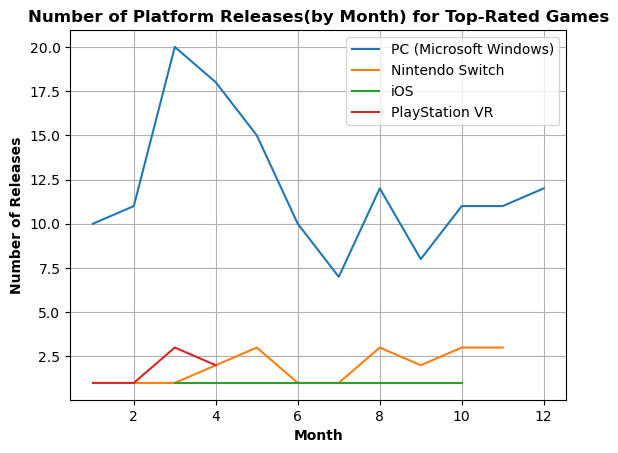

In [220]:
# Line plots of the top rated games releases for the major platforms.
fig, ax = plt.subplots()
for platform in top_platforms:
    i = df_released_dates.loc[(df_released_dates["Grade"] == "Very High") & (df_released_dates["Platforms"]==platform)].groupby("Month")["Platforms"].count()
    ax.plot(i.index, i.values, label=platform)
ax.grid(visible=True, which='both', axis='both')
ax.set_xlabel('Month', fontweight ="bold")
ax.set_ylabel('Number of Releases', fontweight ="bold")
ax.set_title("Number of Platform Releases(by Month) for Top-Rated Games", fontweight ="bold")
ax.legend(loc="best")
plt.savefig("Visuals/Line_plot_top.png",bbox_inches="tight")
plt.show()

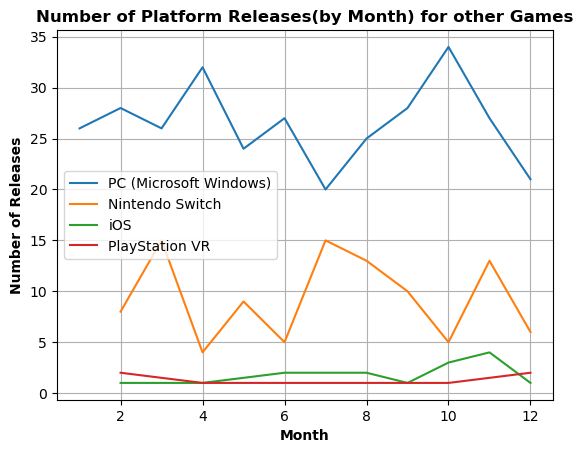

In [221]:
# Line plots of the other games' releases for the major platforms.
fig, ax = plt.subplots()
for platform in top_platforms:
    i = df_released_dates.loc[(df_released_dates["Grade"] != "Very High") & (df_released_dates["Platforms"]==platform)].groupby("Month")["Platforms"].count()
    ax.plot(i.index, i.values, label=platform)
ax.grid(visible=True, which='both', axis='both')
ax.set_xlabel('Month', fontweight ="bold")
ax.set_ylabel('Number of Releases', fontweight ="bold")
ax.set_title("Number of Platform Releases(by Month) for other Games", fontweight ="bold")
ax.legend(loc="best")
plt.savefig("Visuals/Line_plot_other.png",bbox_inches="tight")
plt.show()

## Developer Experience (i.e., Games Developed) and Average Score (Scatter Plot and Linear Regression)

The r-value is: -0.009014420818812431
The p-value is: 0.852483836454154


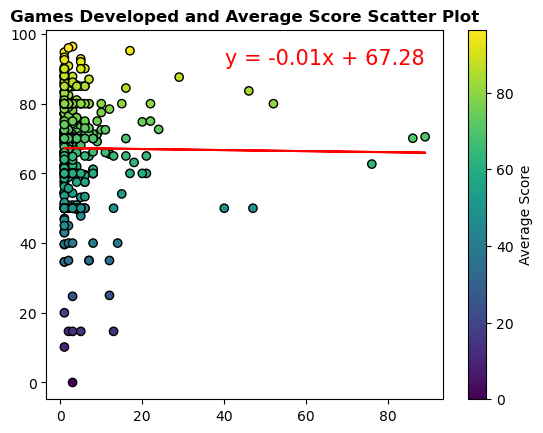

In [113]:

# Build scatter plot.
plt.scatter(dev_df["Games Developed"],dev_df["Average Score"], c=dev_df["Average Score"],edgecolors = "black")
# Add color bar & label to indicate what the colors would mean
clb = plt.colorbar()
clb.set_label("Average Score")

#linear regregression here.
(slope, intercept, rvalue, pvalue, stderr) = linregress(dev_df["Games Developed"],dev_df["Average Score"])
regress_values = dev_df["Games Developed"] * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(dev_df["Games Developed"],regress_values,"r-", label=line_eq)
plt.title("Games Developed and Average Score Scatter Plot", fontweight ="bold")
plt.savefig("Visuals/Games_Developed_and_Average_Score_Scatter_Plot.png",dpi=1200)

# Incorporate annotation, which is actually a legend label.
plt.legend(frameon=False, handlelength=0, loc='best', labelcolor='red', fontsize=15)
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")


The r-value is: -0.009014420818812431
The p-value is: 0.852483836454154


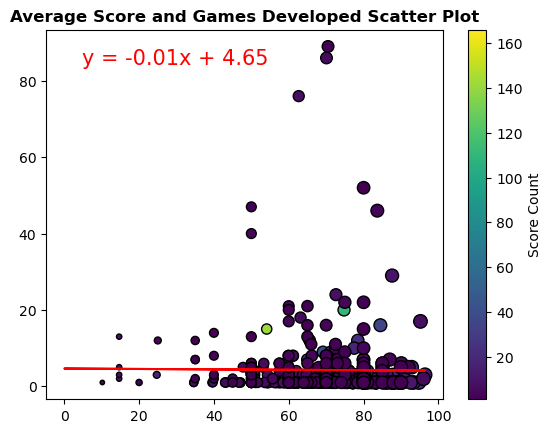

In [223]:
# Build scatter plot.
x=dev_df["Average Score"]
y=dev_df["Games Developed"]
plt.scatter(x=x, y=y, s=x, c=dev_df["Score Count"], edgecolors = "black")
# Add color bar & label to indicate what the colors would mean
clb = plt.colorbar()
clb.set_label("Score Count")

#linear regregression here.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x=x, y=y)
regress_values = x * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x,regress_values,"r-", label=line_eq)
plt.title("Average Score and Games Developed Scatter Plot", fontweight ="bold")
#plt.savefig("Visuals/Average_Score_and_Games_Developed_Scatter_Plot.png",dpi=1200)

# Incorporate annotation, which is actually a legend label.
plt.legend(frameon=False, handlelength=0, loc='best', labelcolor='red', fontsize=15)
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

## Publisher Experience (i.e., Games Published) and Average Score (Scatter Plot and Linear Regression)

The r-value is: -0.03564924612275485
The p-value is: 0.4562463888841528


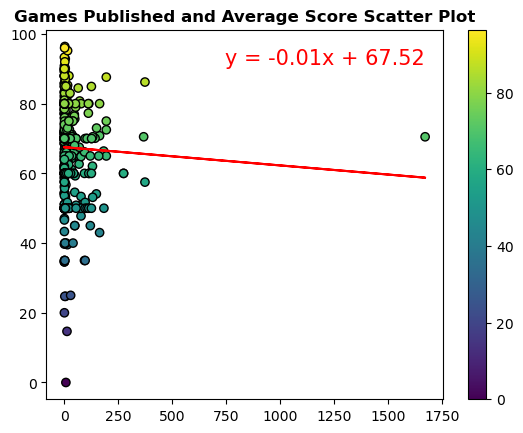

In [68]:

# Build scatter plot.
plt.scatter(pub_df["Games Published"],pub_df["Average Score"], c=pub_df["Average Score"],edgecolors = "black")
# Add color bar & label to indicate what the colors would mean
clb = plt.colorbar()
clb.set_label("")

#linear regregression here.
(slope, intercept, rvalue, pvalue, stderr) = linregress(pub_df["Games Published"],pub_df["Average Score"])
regress_values = pub_df["Games Published"] * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(pub_df["Games Published"],regress_values,"r-", label=line_eq)
plt.title("Games Published and Average Score Scatter Plot", fontweight ="bold")
plt.savefig("Visuals/Games_Published_and_Average_Score_Scatter_Plot.png",dpi=1200)

# Incorporate annotation, which is actually a legend label.
plt.legend(frameon=False, handlelength=0, loc='best', labelcolor='red', fontsize=15)
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")



The r-value is: -0.03564924612275477
The p-value is: 0.4562463888841537


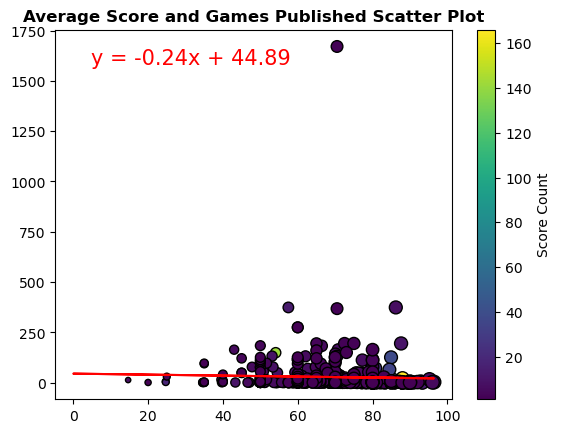

In [225]:
# Build scatter plot.
x=pub_df["Average Score"]
y=pub_df["Games Published"]
plt.scatter(x=x, y=y, s=x, c=pub_df["Score Count"], edgecolors = "black")
# Add color bar & label to indicate what the colors would mean
clb = plt.colorbar()
clb.set_label("Score Count")

#linear regregression here.
(slope, intercept, rvalue, pvalue, stderr) = linregress(x=x, y=y)
regress_values = x * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x,regress_values,"r-", label=line_eq)
plt.title("Average Score and Games Published Scatter Plot", fontweight ="bold")
#plt.savefig("Visuals/Average_Score_and_Games_Developed_Scatter_Plot.png",dpi=1200)

# Incorporate annotation, which is actually a legend label.
plt.legend(frameon=False, handlelength=0, loc='best', labelcolor='red', fontsize=15)
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")